In [1]:
import os
os.chdir("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob

from lib import *

%matplotlib inline

# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:  
- сохраненные маски для картинок из `valid` в формате `pred_valid_template.csv`;
- html страницу с предсказанием модели для всех картинок из `test` и папку с используемыми картинками в этой html странице.  
  
Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (можно прямо в ноутбуке) с описанием Вашего исследования, гипотез и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

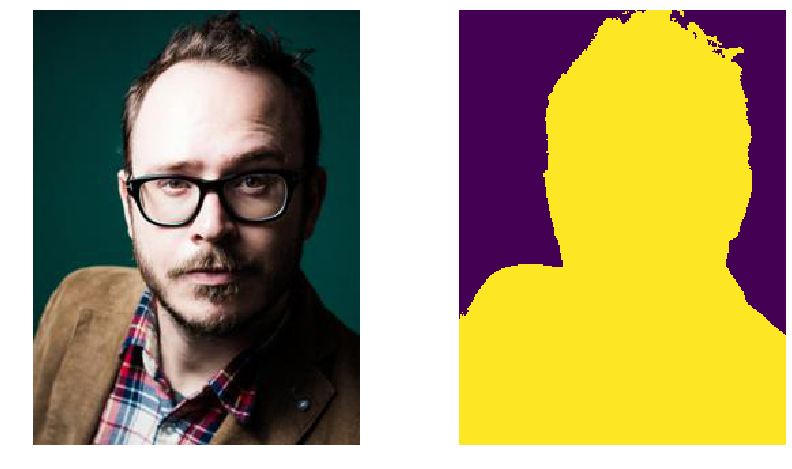

In [4]:
path = "data/train"
images = os.listdir(path)
ind = np.random.choice(images).split(".")[0]

img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
show_img_with_mask(img, mask)

In [10]:
mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
img.shape

(320, 240, 3)

Пример подсчета метрики:

In [17]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
get_dice(mask, random_mask)

0.5590996506480642

Можно для последовательности масок вычислить среднее значение метрики:

In [52]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
get_dice(random_masks_1, random_masks_2)

0.499337332680574

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [7]:
mask.shape

(320, 240)

In [21]:
rle_mask = encode_rle(mask)
rle_mask

'4423 1 4425 3 4434 1 4658 17 4895 25 4921 1 5132 32 5371 35 5608 39 5846 41 6085 45 6324 46 6372 1 6563 50 6801 55 7040 56 7280 58 7519 61 7757 67 7825 1 7995 72 8234 73 8473 76 8712 78 8950 78 9190 81 9430 83 9669 83 9909 84 10148 85 10387 87 10627 88 10866 89 11105 92 11344 93 11583 94 11823 95 12062 97 12302 97 12400 1 12542 98 12781 99 12881 1 13021 100 13260 101 13500 102 13740 103 13980 103 14220 104 14460 104 14700 105 14939 105 15179 107 15419 107 15659 107 15898 108 16138 109 16378 109 16618 109 16857 111 17097 111 17337 112 17577 112 17817 112 18056 114 18296 114 18534 1 18536 114 18774 1 18776 114 19014 116 19254 116 19494 117 19734 117 19975 116 20214 117 20454 117 20694 118 20934 117 21174 118 21414 118 21654 118 21894 118 22133 119 22374 118 22613 119 22853 120 23093 120 23333 120 23573 120 23812 121 24052 122 24292 121 24532 122 24772 122 25012 122 25252 122 25491 123 25731 123 25971 124 26211 124 26450 125 26690 125 26930 126 27169 127 27409 126 27649 126 27889 126 281

Теперь восстановим маску:

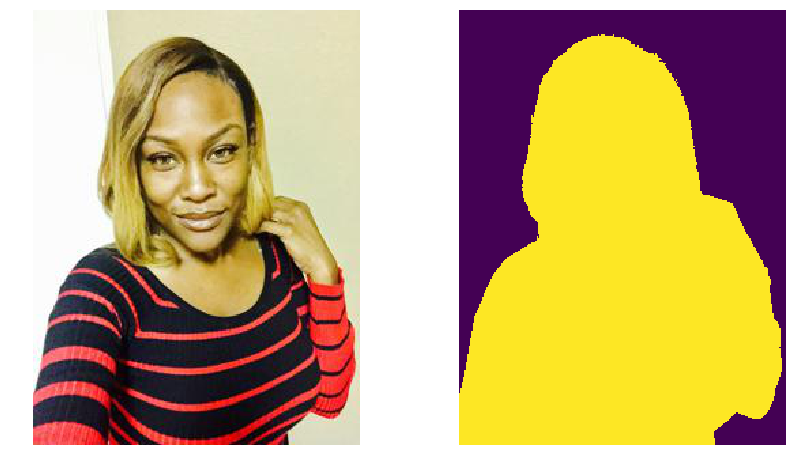

In [23]:
decoded_mask = decode_rle(rle_mask)
show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [2]:
pred = pd.read_csv("data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1315,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
1,1316,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
2,1317,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
3,1318,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
4,1319,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...


In [26]:
pred = pd.read_csv("data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1396,35 31 74 24 275 31 314 24 515 31 554 25 755 32...
1,1352,2537 3 2774 9 3011 13 3250 15 3484 22 3723 24 ...
2,1408,7298 4 7537 8 7548 5 7777 20 8016 23 8256 29 8...
3,1423,2999 15 3236 20 3472 27 3701 41 3939 44 4178 4...
4,1403,1048 3 1288 3 1304 3 1328 2 1524 1 1527 5 1543...


Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [3]:
paths_to_imgs = sorted(glob("data/valid/*"))
# For correct paths on Windows:
paths_to_imgs_1 = [path.replace('\\', '/') for path in paths_to_imgs]
pred_masks = [np.array(Image.open(path)) for path in sorted(glob("data/valid_mask/*"))]

# _ = get_html(paths_to_imgs, pred_masks, path_to_save="results/example")
_ = get_html(paths_to_imgs_1, pred_masks, path_to_save="results/example")

In [22]:
paths_to_imgs_1

['data/valid/1315.jpg',
 'data/valid/1316.jpg',
 'data/valid/1317.jpg',
 'data/valid/1318.jpg',
 'data/valid/1319.jpg',
 'data/valid/1320.jpg',
 'data/valid/1321.jpg',
 'data/valid/1322.jpg',
 'data/valid/1323.jpg',
 'data/valid/1324.jpg',
 'data/valid/1325.jpg',
 'data/valid/1326.jpg',
 'data/valid/1327.jpg',
 'data/valid/1328.jpg',
 'data/valid/1329.jpg',
 'data/valid/1330.jpg',
 'data/valid/1331.jpg',
 'data/valid/1332.jpg',
 'data/valid/1333.jpg',
 'data/valid/1334.jpg',
 'data/valid/1335.jpg',
 'data/valid/1336.jpg',
 'data/valid/1337.jpg',
 'data/valid/1338.jpg',
 'data/valid/1339.jpg',
 'data/valid/1340.jpg',
 'data/valid/1341.jpg',
 'data/valid/1342.jpg',
 'data/valid/1343.jpg',
 'data/valid/1344.jpg',
 'data/valid/1345.jpg',
 'data/valid/1346.jpg',
 'data/valid/1347.jpg',
 'data/valid/1348.jpg',
 'data/valid/1349.jpg',
 'data/valid/1350.jpg',
 'data/valid/1351.jpg',
 'data/valid/1352.jpg',
 'data/valid/1353.jpg',
 'data/valid/1354.jpg',
 'data/valid/1355.jpg',
 'data/valid/135

In [20]:
type(pred_masks[0])

numpy.ndarray

In [17]:
pred_masks[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.